This notebook shows how to modify the **graphical representation of the evolution** of the pywinEA package algorithms.

In [1]:
# External dependencies
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold 

In [2]:
import sys 
sys.path.append('..')

# PyWin dependencies
from pywinEA.algorithm import SPEA2, GA
from pywinEA.population import Population
from pywinEA.fitness import MonoObjectiveCV
from pywinEA.operators import TournamentSelection
from pywinEA.wrapper import Parallel
from pywinEA.visualization import Plotter
from pywinEA.dataset import load_demo

In [3]:
dataset = load_demo() # Load dataset


	Breast Cancer Wisconsin dataset. It contains a total of 569 samples of tumor and malignant cells. 
	Data labeled 1 corresponds to malignant cells, while data labeled 0 corresponds to benign cells. 
	The 30 characteristics contain real values obtained from images of cell nuclei. For more information:

			http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)


	The returned value is a dictionary where 'x_data' are the predictor variables, 'y_data' the class 
	labels and  'features' the name of the characteristics.
	


In [4]:
x_data = dataset['x_data']
y_data = dataset['y_data']
features = dataset['features']

num_noisy_vars = 20

for n in range(num_noisy_vars): # Add noisy variables
    features = np.append(features, 'noisy_var_%d' % n)
    x_data = np.hstack([x_data, np.random.uniform(0, 10, size=x_data.shape[0]).reshape(-1, 1)])
    
print('Num of features %d\nx_data shape %r' % (len(features), x_data.shape))

Num of features 50
x_data shape (569, 50)


In [5]:
# Gaussian naive Bayes as classifier to evaluate fitness (default parameters)
fitness = MonoObjectiveCV(estimator=GaussianNB(), cv=KFold(n_splits=2), score='accuracy')

selection = TournamentSelection(k=2, replacement=False, winners=1)

# Execute 2 SPEA2 algorithms with different initialization in parallel 
# (for more info check PyWinEA basics)
spea_1 = SPEA2(
    population=Population(size=75), archive_length=75, generations=250, 
    fitness=fitness, selection=selection, optimize_features=True, 
    positive_class=1, mutation_rate=0.1, id="SPEA2 (1)", random_state=1111)

spea_2 = SPEA2(
    population=Population(size=75), archive_length=75, generations=250, 
    fitness=fitness, selection=selection, optimize_features=True, 
    positive_class=1, mutation_rate=0.1, id="SPEA2 (1)", random_state=1111)

par = Parallel(spea_1, spea_2)

In [6]:
par = par.fit(x_data, y_data)

(SPEA2) Generations (form 0 to 250): 100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


Most of the customizable parameters are the same as those in the matplotlib package. The following parameters can be modified:

* Color map (according to the color maps available in matplotlib).
* Figure size.
* Title size.
* Legend size.
* Limits of the *x* and *y* axis.
* Opacity (using the alpha parameter).
* Separation between graphics.


In addition, a simplified version of the graphs can be obtained by specifying the simplified parameter as the true. In this case, the multi-objective genetic algorithms will show only the convergence of the hypervolume and the dispersion of the solutions on the non-dominated front. On the other hand, the classic mono-objective algorithms will represent only the evolution in the fitness of the best individual and the number of characteristics in that individual along the generations.

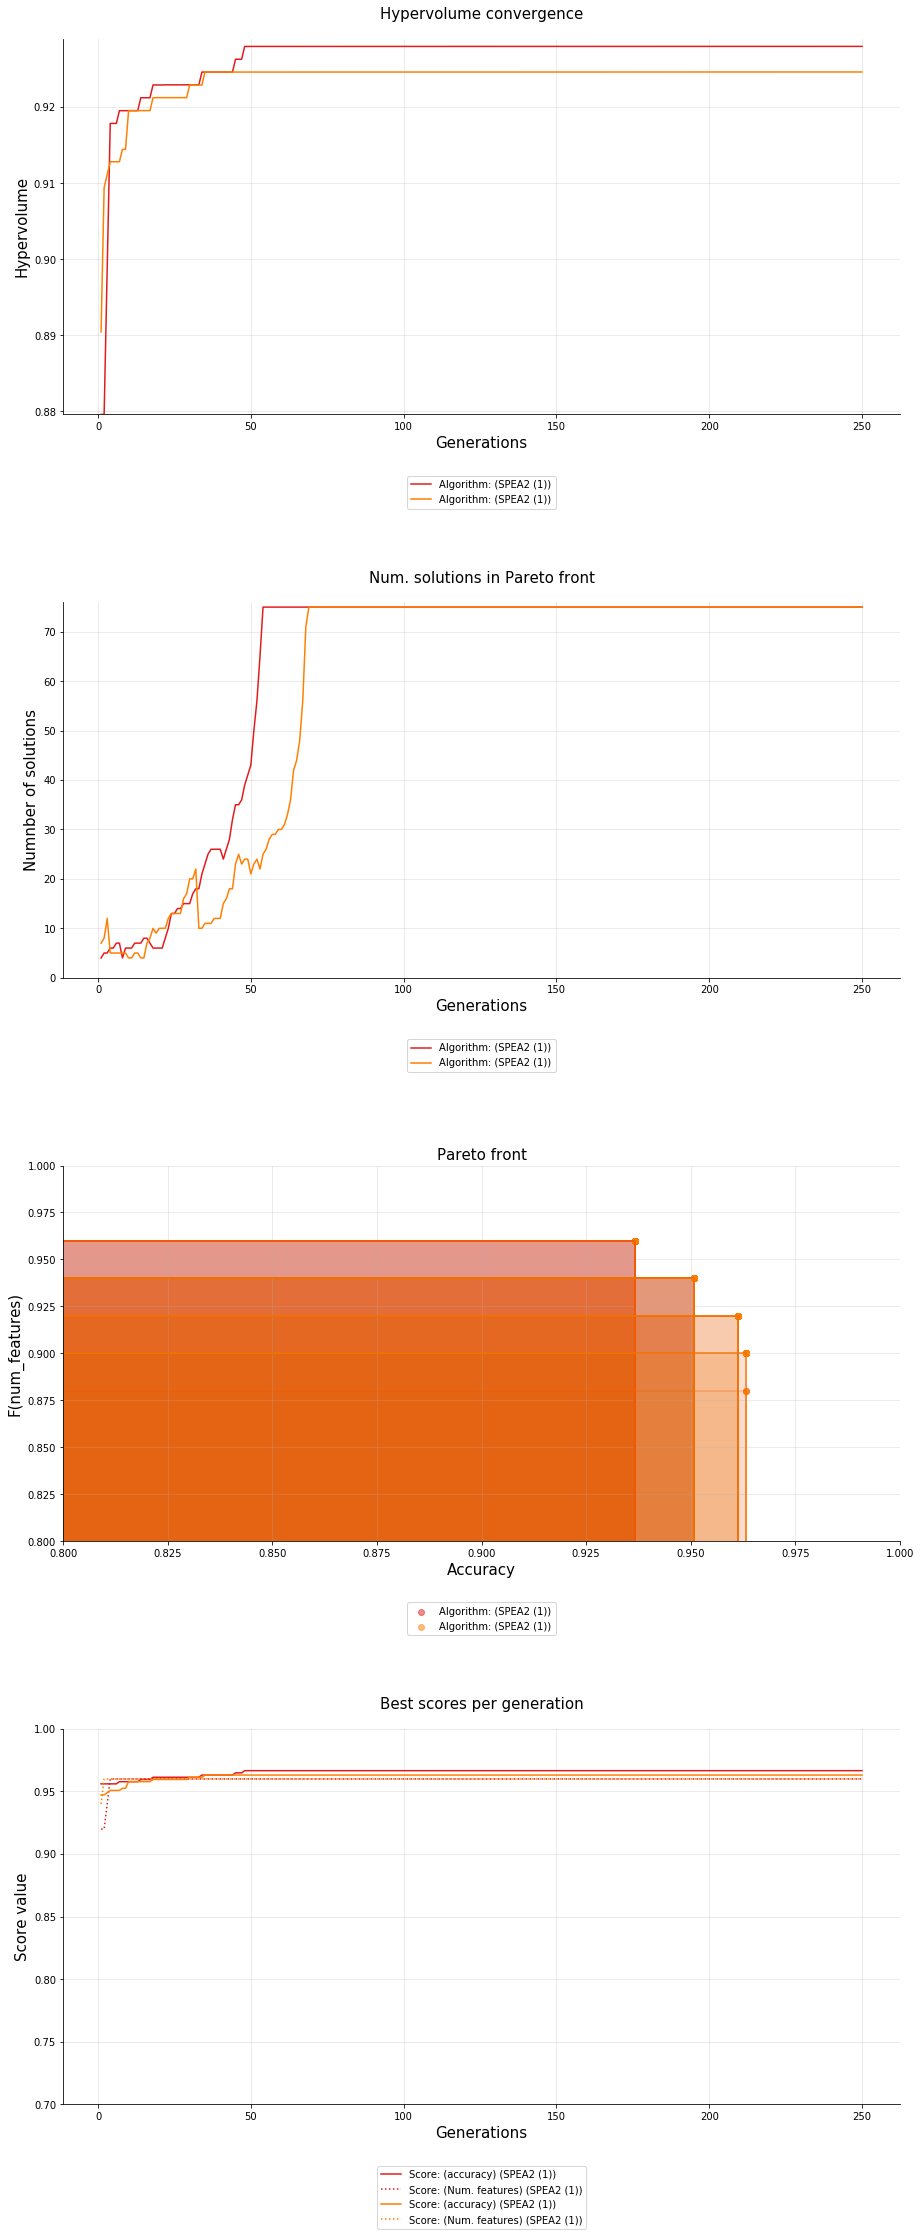

In [13]:
Plotter.plot_evolution(
    par, 
    cmap='Set1',              # Color map
    fig_width=15,      
    wspace=1,                 # Separation 
    title_size=15,
    legend_size=10, 
    pf_top_y_lim=1,           # Limits 
    pf_bottom_x_lim=0.8, 
    pf_bottom_y_lim=0.8, 
    pf_top_x_lim=1, 
    pf_alpha=0.01)

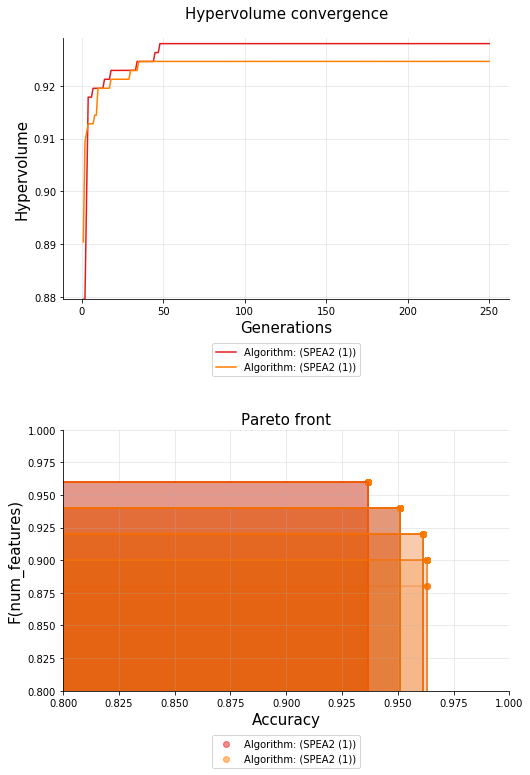

In [12]:
# Simplified version
Plotter.plot_evolution(
    par, 
    cmap='Set1',            
    fig_width=8,      
    wspace=1,               
    title_size=15,
    legend_size=10, 
    pf_top_y_lim=1,         
    pf_bottom_x_lim=0.8, 
    pf_bottom_y_lim=0.8, 
    pf_top_x_lim=1, 
    pf_alpha=0.01,
    simplified=True)

In [9]:
# Mono-objective algorithm
ga_basic = GA(
    population_size=75, generations=250, fitness=fitness, annihilation=0.3, 
    fill_with_elite=0.2, elitism=0.3, mutation_rate=0.1, positive_class=1,
    selection=selection, random_state=1111, id="BasicGA"
)

ga_basic = ga_basic.fit(x_data, y_data)

 (BasicGA) Generations (form 0 to 250): 100%|██████████| 250/250 [00:55<00:00,  4.52it/s]


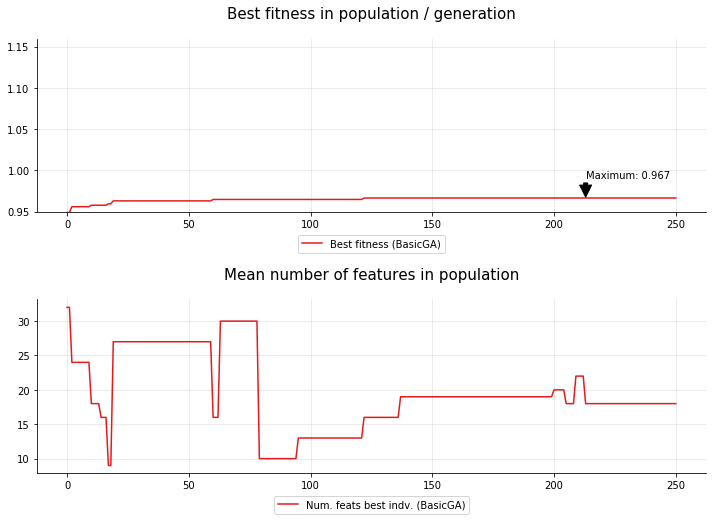

In [10]:
# Simplified version for mono-objective algorithm
Plotter.plot_evolution(
    ga_basic, 
    cmap='Set1',            
    fig_width=8,      
    wspace=1,               
    title_size=15,
    legend_size=10, 
    simplified=True)